In [1]:
#
#
#       2020.11.24
#       Heesung Yang
#       Bayesian Classfication
#       Env : lisa master(single node)
#
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.linalg import sqrtm

In [2]:
# Load data from a npz file
npzfile = np.load('bayes_data.npz') 

X1 = npzfile['X1']
X2 = npzfile['X2']
X3 = npzfile['X3']

Xt1 = npzfile['Xt1']
Xt2 = npzfile['Xt2']
Xt3 = npzfile['Xt3']

K = 3 # number of classes
N = X1.shape[0] # number of train samples per class
Nt = Xt1.shape[0] # number of test samples per class

print(X1.shape)
print(X2.shape)
print(X3.shape)

print(Xt1.shape)
print(Xt2.shape)
print(Xt3.shape)

(100, 2)
(100, 2)
(100, 2)
(10000, 2)
(10000, 2)
(10000, 2)


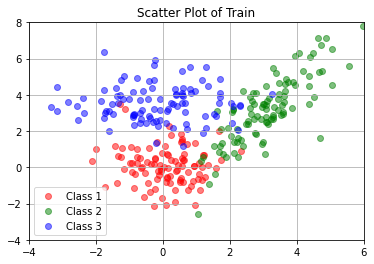

In [3]:
# Plot (X1, X2, X3) each classes have 100 number of data.
plt.scatter(np.array(X1[:,0]), np.array(X1[:,1]), c='r', label='Class 1', alpha=0.5)
plt.scatter(np.array(X2[:,0]), np.array(X2[:,1]), c='g', label='Class 2', alpha=0.5)
plt.scatter(np.array(X3[:,0]), np.array(X3[:,1]), c='b', label='Class 3', alpha=0.5)
plt.axis([-4, 6, -4, 8])
plt.legend()
plt.grid()
plt.title('Scatter Plot of Train') 
plt.show()

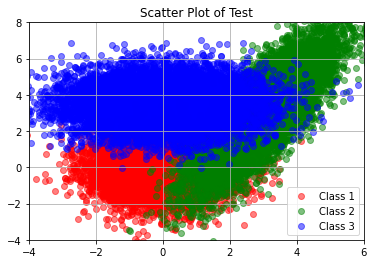

In [4]:
# Plot (Xt1, Xt2, Xt3) each classes have 10000 number of data.
plt.scatter(np.array(Xt1[:,0]), np.array(Xt1[:,1]), c='r', label='Class 1', alpha=0.5)
plt.scatter(np.array(Xt2[:,0]), np.array(Xt2[:,1]), c='g', label='Class 2', alpha=0.5)
plt.scatter(np.array(Xt3[:,0]), np.array(Xt3[:,1]), c='b', label='Class 3', alpha=0.5)
plt.axis([-4, 6, -4, 8])
plt.legend()
plt.grid()
plt.title('Scatter Plot of Test')
plt.show()

In [21]:
## Bayesian Classifier

# Mean Vector and Covariance Matrix (just cov, not centering)
M = np.mat([np.mean(X1, axis=0), np.mean(X2, axis=0), np.mean(X3, axis=0)])
S = np.array([np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)])
Smean = (np.cov(X1.T) + np.cov(X2.T) + np.cov(X3.T)) / 3

# Total set of test samples (X_test) and Class_label (Y_test)
Nt = Xt1.shape[0]
X_test = np.concatenate((Xt1, Xt2, Xt3))
Y_test = np.concatenate((np.zeros((Nt,1)), np.zeros((Nt,1)) + 1, np.zeros((Nt,1))+2), axis=0) 
# Total number of test samples
Ntotal = X_test.shape[0]
# distance values and classified results for three different methods
d1 = np.zeros((3,1)) # 공통 단위 공분산 행렬
d2 = np.zeros((3,1)) # 동일 공분산행렬 (Smean)
d3 = np.zeros((3,1)) # 일반 공분산행렬

Y_predict1 = np.zeros((Ntotal,1))
Y_predict2 = np.zeros((Ntotal,1))
Y_predict3 = np.zeros((Ntotal,1))

K = 3
for i in range(X_test.shape[0]):
    x = X_test[i, :]
    for k in range(K):
        d1[k, 0] = (x - M[k, :]) * (x - M[k, :]).T

In [8]:
## K-Nearest Neighbor Classfier
from scipy.spatial import distance

print('Using Nearest Neighbor Classifier')
K = 3 # number of class
N = X1.shape[0] # number of train samples per class
Nt = Xt1.shape[0] # number of test samples per class

X_train = np.concatenate((X1, X2, X3)) # Total set (Train)
X_test = np.concatenate((Xt1, Xt2, Xt3)) # Total set (Test)

Y_train = np.concatenate((np.zeros((N, 1)), np.zeros((N, 1)) + 1, np.zeros((N, 1)) + 2), axis=0)
Y_test = np.concatenate((np.zeros((Nt, 1)), np.zeros((Nt, 1)) + 1, np.zeros((Nt, 1)) + 2), axis=0)

Ntrain = X_train.shape[0]
Ntest = X_test.shape[0]

distX = np.zeros((Ntest, Ntrain))
Y_predict = np.zeros((Ntest, 1))

# 1-NN
for i in range(Ntest):
    x = X_test[i, :]
    for j in range(Ntrain):
        distX[i, j] = distance.euclidean(x, X_train[j, :])

    minID = np.argmin(distX[i, :])
    Y_predict[i] = Y_train[minID]

Num_err = np.sum((Y_predict - Y_test) != 0)
Error_rate = Num_err / Ntest
print('Overall Test Error Rate {0:6.2f}%'.format(Error_rate*100))

Using Nearest Neighbor Classifier
Overall Test Error Rate  13.63%


In [12]:
# KNN(sklearn)
from sklearn.neighbors import KNeighborsClassifier

K = [1, 5, 10, 50, 100]
Num_err = []

for k in K :
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, np.ravel(Y_train))
    Y_predict = neigh.predict(X_test)
    Y_predict = np.reshape(Y_predict, Y_test.shape)
    Num_err.append(np.sum((Y_predict - Y_test) != 0))

Error_rate = np.array(Num_err) / Ntest

for i in range(len(K)):
    print('Overall Test Error Rate by sklearn {0:6.2f}% (K={1:})'.format(Error_rate[i]*100, K[i]))

Overall Test Error Rate by sklearn  13.63% (K=1)
Overall Test Error Rate by sklearn  10.12% (K=5)
Overall Test Error Rate by sklearn  10.38% (K=10)
Overall Test Error Rate by sklearn  11.01% (K=50)
Overall Test Error Rate by sklearn  12.81% (K=100)
